In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


In [ ]:
data= pd.read_csv("2008_limpia.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
df= data.dropna(subset=["ArrDelay"])
df=df.sample(frac=1).head(6000)
df=df.reset_index()
X= df[["AirTime", "Distance", "DepTime"]]
y= df["ArrDelay"]

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

10

In [ ]:
regr = linear_model.LinearRegression()
results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print("R2: ", r2_score(y_test, y_pred))
    results.append(r2_score(y_test, y_pred))
print("R2 score: " , np.mean(results))


R2:  0.08689743615106127
R2:  0.0454342178373095
R2:  0.06628888264608868
R2:  0.08178968891397875
R2:  0.07301495264963132
R2:  0.0665829484303756
R2:  0.06204839104131632
R2:  0.06347047000517314
R2:  0.027300398409502158
R2:  0.05151640238677169
R2 score:  0.062434378847120844


In [ ]:
X_test

,AirTime,Distance,DepTime
1782,69.0,407,1857.0
3917,144.0,1034,1614.0
221,17.0,72,1938.0
2135,35.0,196,751.0
5224,44.0,247,2150.0
...,...,...,...
2543,108.0,758,1729.0
1773,53.0,331,1636.0
2846,60.0,200,741.0
5799,27.0,116,557.0


In [ ]:
#Regresion lineal multiple
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("R2: ", r2_score(y_test, y_pred))
#Coeficientes (pendientes)
print("Coeficientes: ", regr.coef_)
#Interceptos "b"
print("Interceptos: ", regr.intercept_)


R2:  0.05151640238677169
Coeficientes:  [ 0.46306138 -0.05336998  0.01623842]
Interceptos:  -23.16002516230933


In [ ]:
#Leave-One-Out
results = []
for i in range(len(X)):
    X_train = X.drop(X.index[i])
    y_train = y.drop(y.index[i])
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print("R2: ", r2_score(y_test, y_pred))
    results.append(r2_score(y_test, y_pred))
print("R2 score: " , np.mean(results))


R2:  0.05350082171268822
R2:  0.053512922324711054
R2:  0.053499372587701544
R2:  0.05350339849724184
R2:  0.053504623418085484
R2:  0.05345675386550652
R2:  0.0535063580616747
R2:  0.053502031575820785
R2:  0.05350165237734894
R2:  0.053541224553219635
R2:  0.0535088681359589
R2:  0.05348618553291873
R2:  0.05350827858705176
R2:  0.05351674622244207
R2:  0.053507279480638714
R2:  0.05350727848361603
R2:  0.05352990101610844
R2:  0.053469852509764326
R2:  0.053501188724571325
R2:  0.05351552724414932
R2:  0.05347370905925597
R2:  0.05350602160546092
R2:  0.05349730533481034
R2:  0.053503117265771394
R2:  0.053501244927634195
R2:  0.05349229813807954
R2:  0.05349979909055236
R2:  0.053476587875654236
R2:  0.05348765601166705
R2:  0.05350085922929981
R2:  0.05352182502521119
R2:  0.05349371348394971
R2:  0.05350676756177963
R2:  0.053503079025401634
R2:  0.05350245538621756
R2:  0.053494020577425805
R2:  0.05354400911216384
R2:  0.05356462403685658
R2:  0.053561804311411
R2:  0.053478334

,ArrDelay
0,7.945536
1,17.640779
2,14.426726
3,16.711801
4,2.513305
...,...
595,9.173933
596,9.743411
597,11.734870
598,17.057638


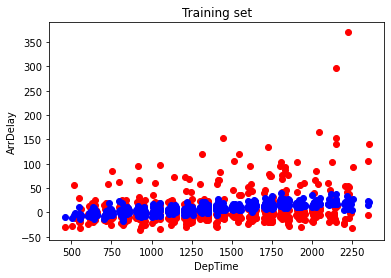

In [ ]:
#Graficamos el test set
import matplotlib.pyplot as plt
plt.scatter(X_test["DepTime"], y_test, color="red")
plt.scatter(X_test["DepTime"], regr.predict(X_test), color="blue")
plt.title("Training set")
plt.xlabel("DepTime")
plt.ylabel("ArrDelay")
plt.show()
